# Data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

%matplotlib inline

In [2]:
data = pd.read_excel('../data/portfolio.xlsx')
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas
0,2015-01-02,1833069,Normal,SDVFAST,Sur,Granada,18198,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1959-09-02,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,2 - CASADO,2000,13,EED,0.0,2019-06-30,BAJA,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,NaN
1,2015-01-02,1833074,Normal,SDVFAST,Noreste,Barcelona,08173,M - MUJER,ES - ESPAÑOLA,SPAIN,1971-04-15,4 - FAMILIARES/PADRES,06 PARADO,4 - SEPARADO/DIVORCIADO,600,12,EED,0.0,2015-01-05,OP,P-Apartamento (domicilio particular),Financiado,Entre 000-050,49+(36*10),49,409,10,12.0
2,2015-01-02,1833079,Normal,SDVFAST,Centro-Noroeste,Madrid Noroeste,28011,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1968-02-10,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,4 - SEPARADO/DIVORCIADO,2500,14,HBD,0.0,2015-01-05,OP,P-Apartamento (domicilio particular),Financiado,Entre 050-100,99+(36*10),99,459,10,NaN
3,2015-01-02,1833080,Normal,SDVFAST,Sur,Sevilla,41500,M - MUJER,ES - ESPAÑOLA,SPAIN,1968-12-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1800,12,EED,0.0,2015-01-13,OP,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,2.0
4,2015-01-02,1833081,Normal,SDVFAST,Noreste,Barcelona,08014,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1977-02-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1500,12,EEE,0.0,2015-01-07,OP,N-Tienda- negocio al publico,Financiado,Entre 050-100,99+(36*10),99,459,10,NaN


In [3]:
data.shape

(481397, 28)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481397 entries, 0 to 481396
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Installation Date       481397 non-null  datetime64[ns]
 1   Installation Number     481397 non-null  int64         
 2   Client Type             481396 non-null  object        
 3   Panel                   481397 non-null  object        
 4   Territorial             481397 non-null  object        
 5   Provincia               481397 non-null  object        
 6   Zip                     481397 non-null  object        
 7   Gender                  481397 non-null  object        
 8   Nationality             481397 non-null  object        
 9   Country Of Birth        481397 non-null  object        
 10  Born Date               479432 non-null  datetime64[ns]
 11  Housing Type            481397 non-null  object        
 12  Labor Situation         481397

In [5]:
data.isnull().sum()

Installation Date              0
Installation Number            0
Client Type                    1
Panel                          0
Territorial                    0
Provincia                      0
Zip                            0
Gender                         0
Nationality                    0
Country Of Birth               0
Born Date                   1965
Housing Type                   0
Labor Situation                0
Marital Status                 0
Income Amount                  0
Number Pay                     0
Price List                     1
Account Balance                1
Monitoring Status Date         0
Monitoring Status              0
Tipo Instalacion               0
Financiado                     0
Rango Kit                      0
Resumen Precio                 0
Kit Contado                    0
Kit Total                      0
Kit Mensualidad                0
Quejas                    399955
dtype: int64

In [6]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Número de Filas:", df.shape[0])
    print("\nNúmero de Columnas:", df.shape[1])
    print("\nColumnas:\n")
    print(data.columns.tolist())
    print("\nValores nulos:", df.isnull().sum().values.sum())
    print("\nValores únicos:\n")
    print(df.nunique())

In [7]:
dataoveriew(data, 'Overiew of the dataset')

Overiew of the dataset:

Número de Filas: 481397

Número de Columnas: 28

Columnas:

['Installation Date', 'Installation Number', 'Client Type', 'Panel', 'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality', 'Country Of Birth', 'Born Date', 'Housing Type', 'Labor Situation', 'Marital Status', 'Income Amount', 'Number Pay', 'Price List', 'Account Balance', 'Monitoring Status Date', 'Monitoring Status', 'Tipo Instalacion', 'Financiado', 'Rango Kit', 'Resumen Precio', 'Kit Contado', 'Kit Total', 'Kit Mensualidad', 'Quejas']

Valores nulos: 401923

Valores únicos:

Installation Date           2203
Installation Number       481301
Client Type                    2
Panel                          2
Territorial                    7
Provincia                     54
Zip                         9182
Gender                         2
Nationality                   11
Country Of Birth             195
Born Date                  27979
Housing Type                   6
Labor Situation               

In [8]:
data['Quejas'] = data['Quejas'].replace(np.nan, 0).astype('int')
data['Installation Number'] = data['Installation Number'].astype('str')
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas
0,2015-01-02,1833069,Normal,SDVFAST,Sur,Granada,18198,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1959-09-02,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,2 - CASADO,2000,13,EED,0.0,2019-06-30,BAJA,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,0
1,2015-01-02,1833074,Normal,SDVFAST,Noreste,Barcelona,08173,M - MUJER,ES - ESPAÑOLA,SPAIN,1971-04-15,4 - FAMILIARES/PADRES,06 PARADO,4 - SEPARADO/DIVORCIADO,600,12,EED,0.0,2015-01-05,OP,P-Apartamento (domicilio particular),Financiado,Entre 000-050,49+(36*10),49,409,10,12
2,2015-01-02,1833079,Normal,SDVFAST,Centro-Noroeste,Madrid Noroeste,28011,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1968-02-10,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,4 - SEPARADO/DIVORCIADO,2500,14,HBD,0.0,2015-01-05,OP,P-Apartamento (domicilio particular),Financiado,Entre 050-100,99+(36*10),99,459,10,0
3,2015-01-02,1833080,Normal,SDVFAST,Sur,Sevilla,41500,M - MUJER,ES - ESPAÑOLA,SPAIN,1968-12-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1800,12,EED,0.0,2015-01-13,OP,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,2
4,2015-01-02,1833081,Normal,SDVFAST,Noreste,Barcelona,08014,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1977-02-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1500,12,EEE,0.0,2015-01-07,OP,N-Tienda- negocio al publico,Financiado,Entre 050-100,99+(36*10),99,459,10,0


In [9]:
data.describe()

,Income Amount,Number Pay,Account Balance,Kit Contado,Kit Total,Kit Mensualidad,Quejas
count,4.813970e+05,481397.000000,481396.000000,481397.000000,481397.000000,481397.000000,481397.000000
mean,2.361286e+04,13.044309,187.670281,108.607619,481.233335,9.934023,0.298753
std,4.444276e+06,1.081657,177.876984,100.868245,111.891311,1.225124,0.905128
min,0.000000e+00,12.000000,-1691.580000,0.000000,0.000000,0.000000,0.000000
25%,1.200000e+03,12.000000,0.000000,49.000000,409.000000,10.000000,0.000000
50%,1.500000e+03,13.000000,170.400000,99.000000,459.000000,10.000000,0.000000
75%,2.000000e+03,14.000000,350.900000,199.000000,559.000000,10.000000,0.000000
max,1.600000e+09,16.000000,8727.990000,1097.000000,4939.000000,99.000000,46.000000


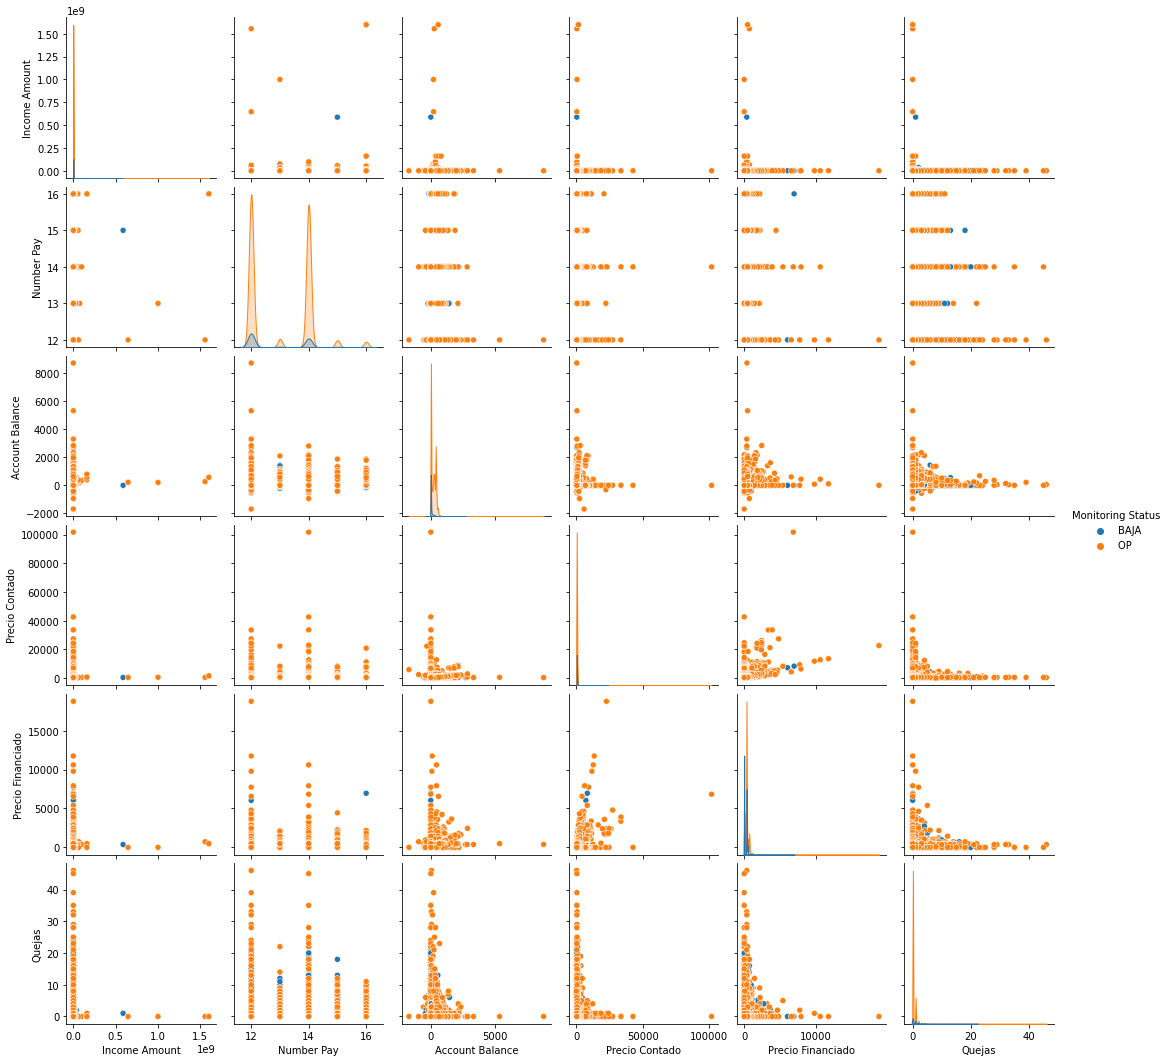

In [12]:
# Don´t do this!!!!

# sns.pairplot(data = data, diag_kind = 'kde', hue = 'Monitoring Status');

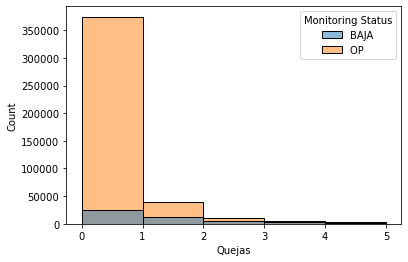

In [10]:
sns.histplot(data = data, x="Quejas", hue = 'Monitoring Status', binwidth=1,  binrange = (0,5));

### Totales y % de Baja en variables categóricas

'Client Type', 'Panel', 'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality', 'Country Of Birth', 'Housing Type', 'Labor Situation', 'Marital Status', 'Number Pay'

In [11]:
tab1 = pd.crosstab(data["Nationality"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Nationality"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Nationality,,,,,
AF - AFRICA MENOS MAGREB,47,281,328,0.143293,0.856707
AJ - AUSTRALIA Y JAPON,7,79,86,0.081395,0.918605
AS - ASIA MENOS JAPON,261,1740,2001,0.130435,0.869565
ES - ESPAÃOLA,167,9427,9594,0.017407,0.982593
ES - ESPAÑOLA,44526,392804,437330,0.101813,0.898187
IB - IBEROAMERICA,484,2896,3380,0.143195,0.856805
MA - MAGREB,59,360,419,0.140811,0.859189
OT - OTROS,423,2332,2755,0.153539,0.846461
RE - RESTO DE EUROPA,196,2008,2204,0.088929,0.911071


In [12]:
tab1 = pd.crosstab(data["Client Type"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Client Type"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Client Type,,,,,
Gran_Cuenta,2080,18208,20288,0.102524,0.897476
Normal,46209,414899,461108,0.100213,0.899787
All,48289,433107,481396,0.100310,0.899690


In [13]:
tab1 = pd.crosstab(data["Panel"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Panel"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Panel,,,,,
SDVFAST,47618,347410,395028,0.120543,0.879457
SDVFSW,671,85698,86369,0.007769,0.992231
All,48289,433108,481397,0.100310,0.899690


In [14]:
tab1 = pd.crosstab(data["Territorial"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Territorial"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Territorial,,,,,
Centro-Noroeste,9433,73083,82516,0.114317,0.885683
Centro-Norte,8135,63055,71190,0.114272,0.885728
Centro-Sur,6958,58006,64964,0.107105,0.892895
ErrorProvincia,2,10,12,0.166667,0.833333
Este,7669,76940,84609,0.090640,0.909360
Noreste,8072,90401,98473,0.081972,0.918028
Sur,8020,71613,79633,0.100712,0.899288
All,48289,433108,481397,0.100310,0.899690


In [15]:
tab1 = pd.crosstab(data["Provincia"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Provincia"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Provincia,,,,,
Alava,215,1188,1403,0.153243,0.846757
Albacete,353,2635,2988,0.118139,0.881861
Alicante,1863,19991,21854,0.085248,0.914752
Almeria,587,6277,6864,0.085519,0.914481
Asturias,924,6941,7865,0.117483,0.882517
Avila,106,1089,1195,0.088703,0.911297
Badajoz,825,5531,6356,0.129799,0.870201
Baleares,1292,20299,21591,0.059840,0.940160
Barcelona,6025,66471,72496,0.083108,0.916892


In [16]:
tab1 = pd.crosstab(data["Gender"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Gender"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Gender,,,,,
H - HOMBRE,36847,336423,373270,0.098714,0.901286
M - MUJER,11442,96685,108127,0.105820,0.894180
All,48289,433108,481397,0.100310,0.899690


In [17]:
tab1 = pd.crosstab(data["Housing Type"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Housing Type"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Housing Type,,,,,
1 - PROPIEDAD SIN HIPOTECA,32502,336685,369187,0.088037,0.911963
2 - PROPIEDAD HIPOTECADA,9752,67320,77072,0.126531,0.873469
3 - ALQUILER,4782,22703,27485,0.173986,0.826014
4 - FAMILIARES/PADRES,782,2818,3600,0.217222,0.782778
5 - EMPRESA,470,3581,4051,0.116021,0.883979
6 - OTROS,1,1,2,0.500000,0.500000
All,48289,433108,481397,0.100310,0.899690


In [18]:
tab1 = pd.crosstab(data["Labor Situation"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Labor Situation"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Labor Situation,,,,,
01 ASALARIADO FIJO,13948,167066,181014,0.077055,0.922945
02 ASALARIADO TEMPORAL,403,1798,2201,0.183099,0.816901
03 FUNCIONARIO,1755,18678,20433,0.085890,0.914110
04 AUTONOMO,23952,143893,167845,0.142703,0.857297
06 PARADO,1145,4245,5390,0.212430,0.787570
07 PENSIONISTA (JUBILACION),6153,91339,97492,0.063113,0.936887
08 PENSIONISTA (VIUDEDAD),556,3472,4028,0.138034,0.861966
09 PENSIONISTA (LARGA ENFERMEDAD),377,2617,2994,0.125919,0.874081
All,48289,433108,481397,0.100310,0.899690


In [19]:
tab1 = pd.crosstab(data["Marital Status"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Marital Status"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Marital Status,,,,,
1 - SOLTERO,12900,88479,101379,0.127245,0.872755
2 - CASADO,30582,300667,331249,0.092323,0.907677
3 - VIUDO,2183,25759,27942,0.078126,0.921874
4 - SEPARADO/DIVORCIADO,2243,15818,18061,0.124190,0.875810
5 ? PAREJA DE HECHO,379,2346,2725,0.139083,0.860917
5 â PAREJA DE HECHO,2,39,41,0.048780,0.951220
All,48289,433108,481397,0.100310,0.899690


In [20]:
tab1 = pd.crosstab(data["Number Pay"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Number Pay"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Number Pay,,,,,
12,28132,208865,236997,0.118702,0.881298
13,1003,11479,12482,0.080356,0.919644
14,17928,195595,213523,0.083963,0.916037
15,752,9629,10381,0.072440,0.927560
16,474,7540,8014,0.059146,0.940854
All,48289,433108,481397,0.100310,0.899690


In [21]:
tab1 = pd.crosstab(data["Financiado"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Financiado"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Financiado,,,,,
Contado,290,2735,3025,0.095868,0.904132
Financiado,47308,425571,472879,0.100043,0.899957
Financiado GGCC,691,4802,5493,0.125796,0.874204
All,48289,433108,481397,0.100310,0.899690


In [22]:
tab1 = pd.crosstab(data["Rango Kit"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Rango Kit"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Rango Kit,,,,,
A 0,10368,89046,99414,0.104291,0.895709
Entre 000-050,12061,83910,95971,0.125673,0.874327
Entre 050-100,14553,127786,142339,0.102242,0.897758
Entre 100-200,8242,89589,97831,0.084247,0.915753
Entre 200-300,2124,29430,31554,0.067313,0.932687
Mas de 300,941,13347,14288,0.065859,0.934141
All,48289,433108,481397,0.100310,0.899690


In [23]:
tab1 = pd.crosstab(data["Tipo Instalacion"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Tipo Instalacion"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Tipo Instalacion,,,,,
C-Comunidad de Propietarios,13,47,60,0.216667,0.783333
N- Oficinas en Altura,23,375,398,0.057789,0.942211
N-Autocaravana,0,1,1,0.000000,1.000000
"N-Bar, Pub, Restaurante",1659,10136,11795,0.140653,0.859347
N-Casetas de Obra,4,42,46,0.086957,0.913043
"N-Nave, taller (industrial)",3750,19091,22841,0.164178,0.835822
"N-Oficinas, empresas",1537,8484,10021,0.153378,0.846622
N-Tienda- negocio al publico,8778,34754,43532,0.201645,0.798355
P-Apartamento (domicilio particular),14607,175058,189665,0.077015,0.922985


### Correlación

In [24]:
data['Monitoring Status'] = data['Monitoring Status'].astype('str').str.strip()
data['Monitoring Status'] = data['Monitoring Status'].replace({'OP': 0, 'BAJA': 1}).astype(int)
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas
0,2015-01-02,1833069,Normal,SDVFAST,Sur,Granada,18198,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1959-09-02,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,2 - CASADO,2000,13,EED,0.0,2019-06-30,1,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,0
1,2015-01-02,1833074,Normal,SDVFAST,Noreste,Barcelona,08173,M - MUJER,ES - ESPAÑOLA,SPAIN,1971-04-15,4 - FAMILIARES/PADRES,06 PARADO,4 - SEPARADO/DIVORCIADO,600,12,EED,0.0,2015-01-05,0,P-Apartamento (domicilio particular),Financiado,Entre 000-050,49+(36*10),49,409,10,12
2,2015-01-02,1833079,Normal,SDVFAST,Centro-Noroeste,Madrid Noroeste,28011,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1968-02-10,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,4 - SEPARADO/DIVORCIADO,2500,14,HBD,0.0,2015-01-05,0,P-Apartamento (domicilio particular),Financiado,Entre 050-100,99+(36*10),99,459,10,0
3,2015-01-02,1833080,Normal,SDVFAST,Sur,Sevilla,41500,M - MUJER,ES - ESPAÑOLA,SPAIN,1968-12-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1800,12,EED,0.0,2015-01-13,0,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,2
4,2015-01-02,1833081,Normal,SDVFAST,Noreste,Barcelona,08014,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1977-02-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1500,12,EEE,0.0,2015-01-07,0,N-Tienda- negocio al publico,Financiado,Entre 050-100,99+(36*10),99,459,10,0


In [25]:
corr = data.corr()
corr

,Income Amount,Number Pay,Account Balance,Monitoring Status,Kit Contado,Kit Total,Kit Mensualidad,Quejas
Income Amount,1.000000,0.006177,0.004949,-0.000651,-0.000114,0.001249,0.000248,-0.001111
Number Pay,0.006177,1.000000,0.063155,-0.060205,0.040549,0.014712,0.001049,-0.023667
Account Balance,0.004949,0.063155,1.000000,-0.243677,-0.011989,0.135189,0.032233,-0.206959
Monitoring Status,-0.000651,-0.060205,-0.243677,1.000000,-0.043532,-0.057125,-0.001524,0.241926
Kit Contado,-0.000114,0.040549,-0.011989,-0.043532,1.000000,0.874372,-0.066267,-0.023913
Kit Total,0.001249,0.014712,0.135189,-0.057125,0.874372,1.000000,0.157498,-0.034510
Kit Mensualidad,0.000248,0.001049,0.032233,-0.001524,-0.066267,0.157498,1.000000,-0.005819
Quejas,-0.001111,-0.023667,-0.206959,0.241926,-0.023913,-0.034510,-0.005819,1.000000


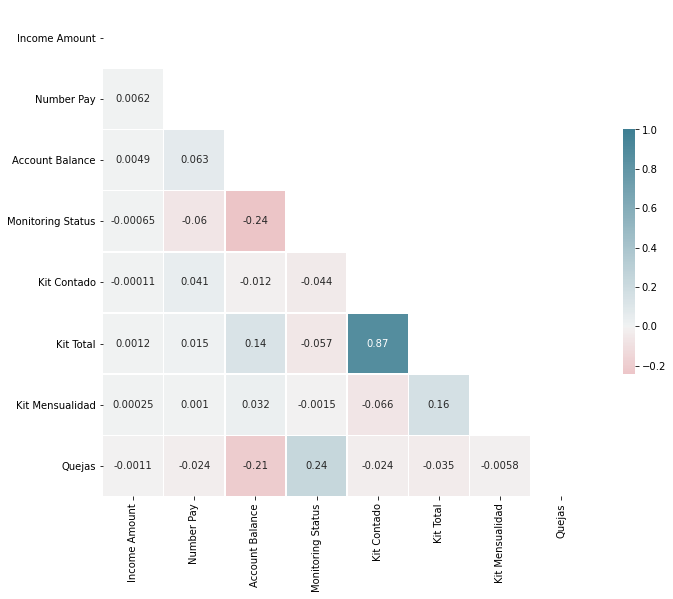

In [26]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [27]:
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas
0,2015-01-02,1833069,Normal,SDVFAST,Sur,Granada,18198,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1959-09-02,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,2 - CASADO,2000,13,EED,0.0,2019-06-30,1,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,0
1,2015-01-02,1833074,Normal,SDVFAST,Noreste,Barcelona,08173,M - MUJER,ES - ESPAÑOLA,SPAIN,1971-04-15,4 - FAMILIARES/PADRES,06 PARADO,4 - SEPARADO/DIVORCIADO,600,12,EED,0.0,2015-01-05,0,P-Apartamento (domicilio particular),Financiado,Entre 000-050,49+(36*10),49,409,10,12
2,2015-01-02,1833079,Normal,SDVFAST,Centro-Noroeste,Madrid Noroeste,28011,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1968-02-10,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,4 - SEPARADO/DIVORCIADO,2500,14,HBD,0.0,2015-01-05,0,P-Apartamento (domicilio particular),Financiado,Entre 050-100,99+(36*10),99,459,10,0
3,2015-01-02,1833080,Normal,SDVFAST,Sur,Sevilla,41500,M - MUJER,ES - ESPAÑOLA,SPAIN,1968-12-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1800,12,EED,0.0,2015-01-13,0,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,2
4,2015-01-02,1833081,Normal,SDVFAST,Noreste,Barcelona,08014,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1977-02-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1500,12,EEE,0.0,2015-01-07,0,N-Tienda- negocio al publico,Financiado,Entre 050-100,99+(36*10),99,459,10,0


### Filtrado de una comunidad para MVP

In [28]:
provincias = ['Alicante', 'Valencia', 'Castellon']

data_filtered = data[data['Provincia'].isin(provincias)]
data_filtered.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas
54,2015-01-03,1833306,Normal,SDVFAST,Este,Alicante,03689,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,HBD,435.6,2017-12-31,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0
83,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,0.0,2018-02-28,1,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1
99,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,03150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,0.0,2015-01-07,0,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1
131,2015-01-07,1833687,Normal,SDVFAST,Este,Alicante,03010,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1986-06-18,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,2000,12,TSE,20.0,2018-03-31,1,N-Tienda- negocio al publico,Financiado,A 0,0+(36*10),0,360,10,0
140,2015-01-07,1833766,Normal,SDVFAST,Este,Alicante,03169,M - MUJER,UE - UNION EUROPEA,UNITED KINGDOM,1966-02-06,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,4 - SEPARADO/DIVORCIADO,1600,12,HBD,0.0,2015-01-14,0,P-Chalet adosado,Financiado,A 0,0+(36*10),0,360,10,0


In [29]:
data_filtered.to_excel('../data/portfolio_com_valencia.xlsx')